In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [2]:
pwd = os.getcwd()
path2dat = pwd + '/'
datalst = os.listdir(path2dat+'data_reps/data_rep_000/')

In [3]:
PDF_X00_LOWQ2 = "fort.1"
PDF_X00_HIGHQ2 = "fort.2"

In [4]:
PDF_KT00_LOWQ2 = "fort.1000"
PDF_KT00_HIGHQ2 = "fort.2000"

In [5]:
PDF_X02_LOWQ2 = "fort.101"
PDF_X02_HIGHQ2 = "fort.102"

In [6]:
PDF_X04_LOWQ2 = "fort.301"
PDF_X04_HIGHQ2 = "fort.302"

In [7]:
PDF_X06_LOWQ2 = "fort.501"
PDF_X06_HIGHQ2 = "fort.502"

In [8]:
TMDdatalst = [PDF_X00_LOWQ2,  PDF_X00_HIGHQ2,
              PDF_KT00_LOWQ2, PDF_KT00_HIGHQ2,
              PDF_X02_LOWQ2,  PDF_X02_HIGHQ2, 
              PDF_X04_LOWQ2,  PDF_X04_HIGHQ2,
              PDF_X06_LOWQ2, PDF_X06_HIGHQ2]

In [9]:
TMDdatalst

['fort.1',
 'fort.2',
 'fort.1000',
 'fort.2000',
 'fort.101',
 'fort.102',
 'fort.301',
 'fort.302',
 'fort.501',
 'fort.502']

In [10]:
up = "up"
u1 = "uHe"
u2 = "uXe"
ubp = "dp"
ub1 = "d1"
ub2 = "d2"

In [11]:
TMDdatalst

['fort.1',
 'fort.2',
 'fort.1000',
 'fort.2000',
 'fort.101',
 'fort.102',
 'fort.301',
 'fort.302',
 'fort.501',
 'fort.502']

In [12]:
_fp = 'fort.1'
fp0 = path2dat+'/data_reps/data_rep_000/'+ _fp
df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)

In [13]:
errsq = {}
for _fp in TMDdatalst:
    fp0 = path2dat+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    errsq[_fp] = {}
    errsq[_fp][u1] = []
    errsq[_fp][u2] = [] 
    for i in range(len(df0)):
        errsq[_fp][u1].append(0)
        errsq[_fp][u2].append(0)
    for i in range(48):
        j = 2*(i+1)
        Splus = j
        Sminus = j-1
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        fpp = path2dat+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp = pd.read_csv(fpp, delimiter = ',',delim_whitespace=True)
        fpm = path2dat+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm = pd.read_csv(fpm, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp)):
                errp = np.abs(dfp['u1'][k]/dfp['up'][k] -df0['u1'][k]/df0['up'][k])
                errm = np.abs(dfm['u1'][k]/dfm['up'][k] -df0['u1'][k]/df0['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u1][k] = errsq[_fp][u1][k] + (maxx)**2
                errp = np.abs(dfp['u2'][k]/dfp['up'][k] -df0['u2'][k]/df0['up'][k])
                errm = np.abs(dfm['u2'][k]/dfm['up'][k] -df0['u2'][k]/df0['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u2][k] = errsq[_fp][u2][k] + (maxx)**2

In [14]:
maxrat = {}
minrat = {}
for _fp in TMDdatalst:
    maxrat[_fp] = {}
    minrat[_fp] = {}
    maxrat[_fp][u1] = []
    minrat[_fp][u1] = []
    maxrat[_fp][u2] = []
    minrat[_fp][u2] = []
    print(_fp)
    fp0 = path2dat+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    centralrat_u1 = (df0['u1']/df0['up'])
    centralrat_u2 = (df0['u2']/df0['up'])
    maxrat[_fp][u1] = centralrat_u1 + np.sqrt(errsq[_fp][u1])/(1.645)
    minrat[_fp][u1] = centralrat_u1 - np.sqrt(errsq[_fp][u1])/(1.645)
    maxrat[_fp][u2] = centralrat_u2 + np.sqrt(errsq[_fp][u2])/(1.645)
    minrat[_fp][u2] = centralrat_u2 - np.sqrt(errsq[_fp][u2])/(1.645)

fort.1
fort.2
fort.1000
fort.2000
fort.101
fort.102
fort.301
fort.302
fort.501
fort.502


In [15]:
print('Done!')

Done!


In [16]:
def plot_68percent(axes,filename,xaxis,nucleus,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = maxlib[filename][nucleus]
    minn = minlib[filename][nucleus]
    xdata = file[xaxis]
    xmin = np.min(xdata)
    xmax = np.max(xdata)
    yUP = interp1d(xdata, maxx, kind='linear')
    yLO = interp1d(xdata, minn, kind='linear')
    axes.fill_between(xdata,maxx,minn,color = clr,alpha=0.4)

In [17]:
def plot_68percent2(axes,filename,xaxis,parton1,parton2,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = []
    minn = []
    
    for i in range(len(maxlib[filename][parton1])):
        maxx.append(maxlib[filename][parton1][i] + maxlib[filename][parton2][i] )
        minn.append(minlib[filename][parton1][i] + minlib[filename][parton2][i] )
    xdata = file[xaxis]
    xmin = np.min(xdata)
    xmax = np.max(xdata)
    yUP = interp1d(xdata, maxx, kind='linear')
    yLO = interp1d(xdata, minn, kind='linear')
    axes.fill_between(xdata,maxx,minn,color = clr,alpha=0.4)

In [18]:
def plot_68percent_ratio(axes,filename,xaxis,nucleus,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = maxlib[filename][nucleus]
    minn = minlib[filename][nucleus]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    xdata = file[xaxis]
    end = len(xdata)
    
    xxdata = xdata[1:end]
    
    ratio_max = []
    ratio_min = []
    for i in range(len(xxdata)):
        ratio_max.append(maxx[i+1]/maxx_proton[i+1])
        ratio_min.append(minn[i+1]/minn_proton[i+1])
    xmin = np.min(xxdata)
    xmax = np.max(xxdata)
    yUP = interp1d(xxdata, ratio_max, kind='linear')
    yLO = interp1d(xxdata, ratio_min, kind='linear')
    axes.fill_between(xxdata,ratio_max,ratio_min,color = clr,alpha=0.4)

In [19]:
def plot_68percent_ratio2(axes,filename,xaxis,parton1,parton2,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    
    maxx = []
    minn = []
    
    for i in range(len(maxlib[filename][parton1])):
        maxx.append(maxlib[filename][parton1][i] + maxlib[filename][parton2][i] )
        minn.append(minlib[filename][parton1][i] + minlib[filename][parton2][i] )
        
    maxx_proton = []
    minn_proton = []
    
    for i in range(len(maxlib[filename][up])):
        maxx_proton.append(maxlib[filename][up][i] + maxlib[filename][ubp][i] )
        minn_proton.append(minlib[filename][up][i] + minlib[filename][ubp][i] )

    xdata = file[xaxis]
    end = len(xdata)
    
    xxdata = xdata[1:end]
    
    ratio_max = []
    ratio_min = []
    for i in range(len(xxdata)):
        ratio_max.append(maxx[i+1]/maxx_proton[i+1])
        ratio_min.append(minn[i+1]/minn_proton[i+1])
    xmin = np.min(xxdata)
    xmax = np.max(xxdata)
    yUP = interp1d(xxdata, ratio_max, kind='linear')
    yLO = interp1d(xxdata, ratio_min, kind='linear')
    axes.fill_between(xxdata,ratio_max,ratio_min,color = clr,alpha=0.4)

In [20]:
def plot_68percent(axes,filename,xaxis,nucleus,clr):
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    maxx = maxrat[filename][nucleus]
    minn = minrat[filename][nucleus]
    xdata = file[xaxis]
    axes.fill_between(xdata,maxx,minn,color = clr,alpha=0.4)

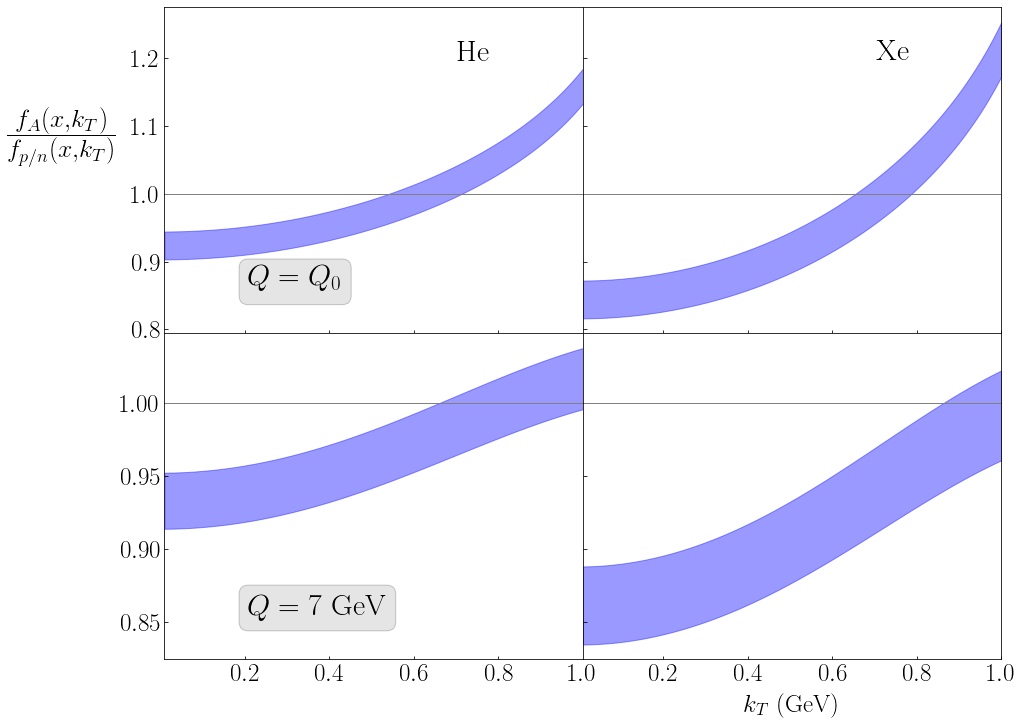

In [21]:
fig2, axs2 = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

plot_68percent(axs2[0,0],PDF_X02_LOWQ2,"kt",u1,"blue")
plot_68percent(axs2[0,1],PDF_X02_LOWQ2,"kt",u2,"blue")
plot_68percent(axs2[1,0],PDF_X02_HIGHQ2,"kt",u1,"blue")
plot_68percent(axs2[1,1],PDF_X02_HIGHQ2,"kt",u2,"blue")


axs2[0,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs2[0,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)

axs2[1,0].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)
axs2[1,1].axhline(y=1, xmin=0, xmax=1,color = 'grey',linewidth=1)



# Plot Labels
axs2[0,1].set_xlabel(r"\rm $k_t$ (GeV)", fontsize = 25, labelpad = 10)

axs2[0,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs2[0,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs2[0,0].set_xlim(0.01,1)
axs2[0,1].set_xlim(0.01,1)


# Plot Labels

axs2[0,0].set_ylabel(r"\rm $\frac{f_A(x,k_T)}{f_{p/n}(x,k_T)}$", fontsize = 37,rotation = 0,labelpad = 70)
axs2[1,1].set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 25, labelpad = 10)

axs2[1,0].tick_params(axis = 'both', direction ='in',labelsize = 25)
axs2[1,1].tick_params(axis = 'both', direction ='in',labelsize = 25)

# Plot Limits
axs2[1,0].set_xlim(0.01,1)
axs2[1,1].set_xlim(0.01,1)

# Text Boxes ##
props = dict(boxstyle='round', facecolor='white', alpha=0)
props2 = dict(boxstyle='round', facecolor='grey', alpha=0.2)


axs2[0,0].text(0.2, 0.2,  r"\rm $Q = Q_0$", transform=axs2[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)

axs2[1,0].text(0.2, 0.2,  r"\rm $Q = 7$ GeV", transform=axs2[1,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props2)


axs2[0,0].text(0.7, 0.9,  r"\rm He", transform=axs2[0,0].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

axs2[0,1].text(0.7, 0.9,  r"\rm Xe", transform=axs2[0,1].transAxes, fontsize=30,
verticalalignment='top', bbox=props)

#axs2[0,1].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))

fig2.set_size_inches(15,12)


In [22]:
fig2.savefig('nTMPDF_Ratios.pdf', bbox_inches = "tight")

In [235]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=1):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:
        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0.1,
                                                 color=c))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

In [24]:
def plot_3D(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(ax, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)

In [25]:
def plot_3D_ratio(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    ratio_max = []
    ratio_min = []
    xdat = []
    for i in range(len(xdata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        xdat.append(xdata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(xdata)):
        if(xdata[i] >= xlim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydata[1:term]
    xdat = xdat[1:term]
    fill_between_3d(ax, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr)

In [26]:
def plot_3D_ratio_x(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    ratio_max = []
    ratio_min = []
    ydat = []
    for i in range(len(ydata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        ydat.append(ydata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(ax, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr)

In [150]:
def plot_3D(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(ax, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)
    return xdata,ydata,maxx,minn

In [156]:
def plot_3D_x(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(ax, xdat,ydat, zmax, xdat,ydat,zmin, mode = 1, c=clr)
    return xdat,ydat,zmax,zmin

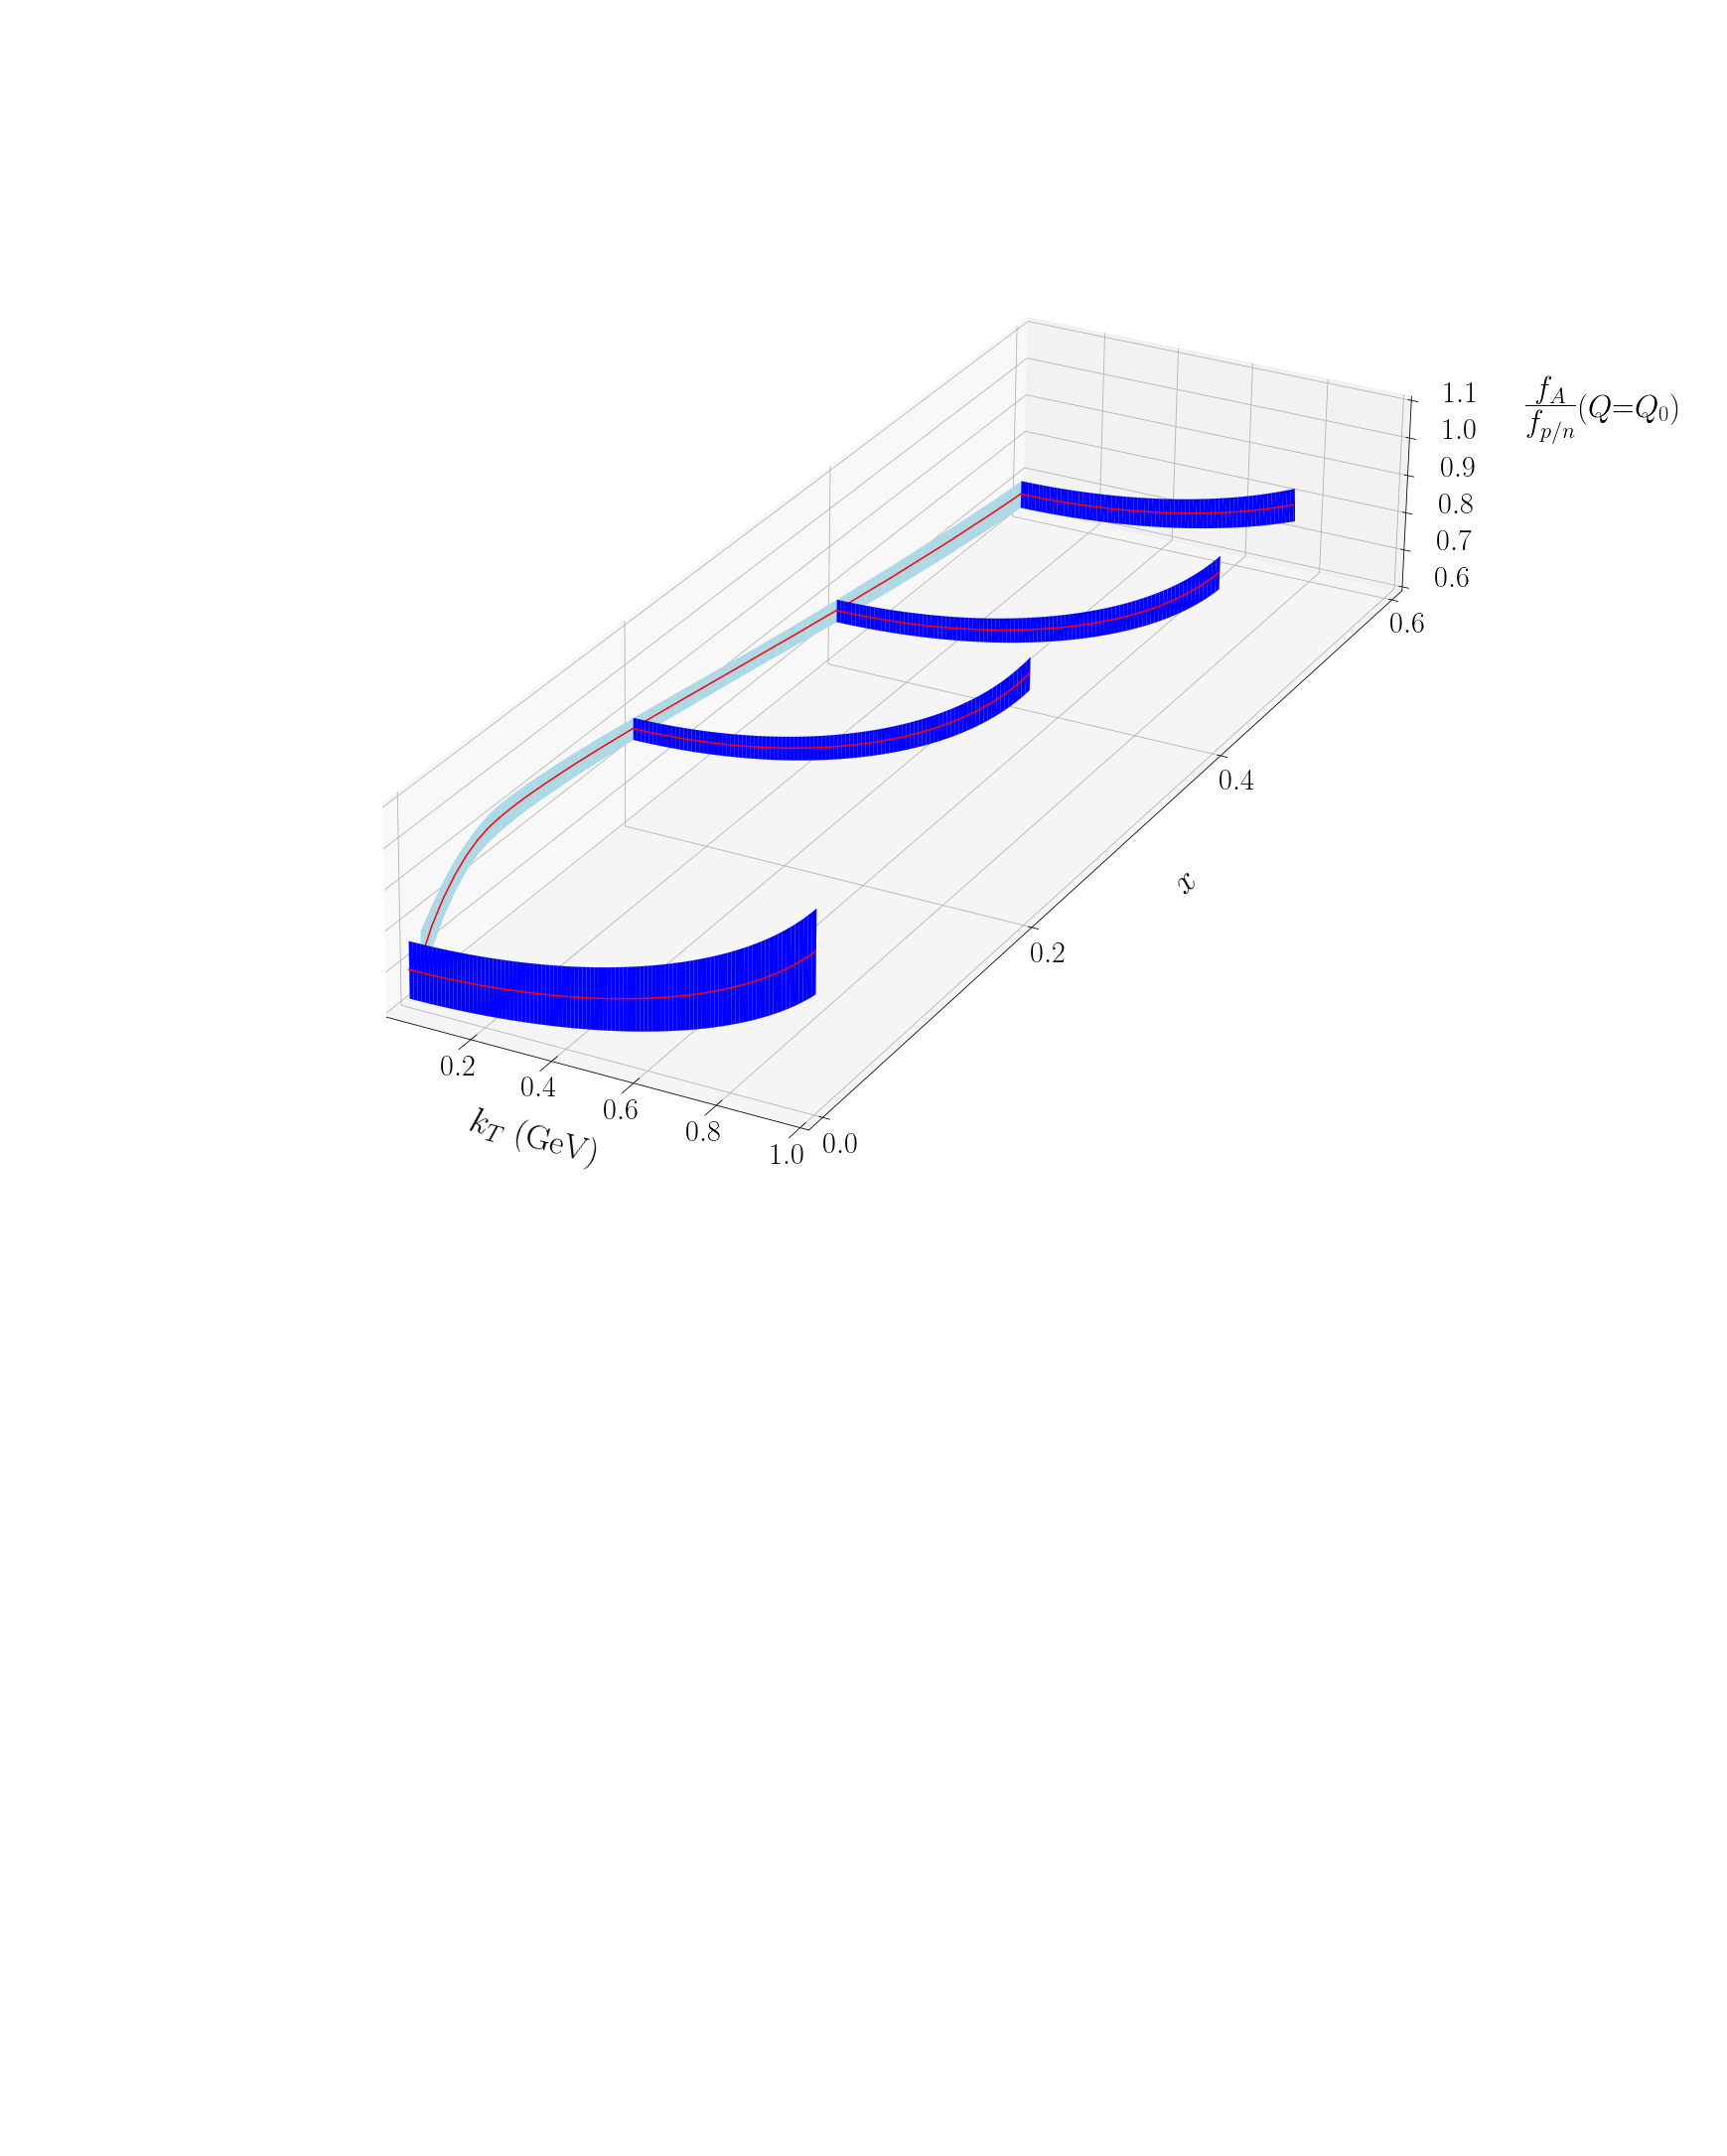

In [276]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.8*8, 0.30*8,4]))
ax.view_init(azim=-61,elev=25)
ax.set_position([-1, 1, 1.5, 1.5])

xdata,ydata,maxx,minn=plot_3D_x(ax,PDF_KT00_LOWQ2,u2,"x",0.01,'lightblue',0.61)
ax.plot(xdata,ydata,np.add(maxx,minn)/2,c='red',zorder=63)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X00_LOWQ2,u2,"kt",0,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=200)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X02_LOWQ2,u2,"kt",0.2,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=300)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X04_LOWQ2,u2,"kt",0.4,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=400)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X06_LOWQ2,u2,"kt",0.6,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=500)

ax.set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 35, labelpad = 35)
ax.set_ylabel(r"\rm $x$", fontsize = 35, labelpad = 75)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"\rm $\frac{f_A}{f_{p/n}}\scriptstyle{(Q=Q_0)}$", fontsize = 45,rotation = 0,labelpad =130)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis = 'both', direction ='in',labelsize = 30)


#ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([0.0,0.2,0.4,0.6])
#ax.set_zticks([0.7,0.8,0.9,1.0,1.1])

ax.dist = 18


fig.savefig("W_PDF_LOWQ_ratio.pdf",bbox_inches='tight')

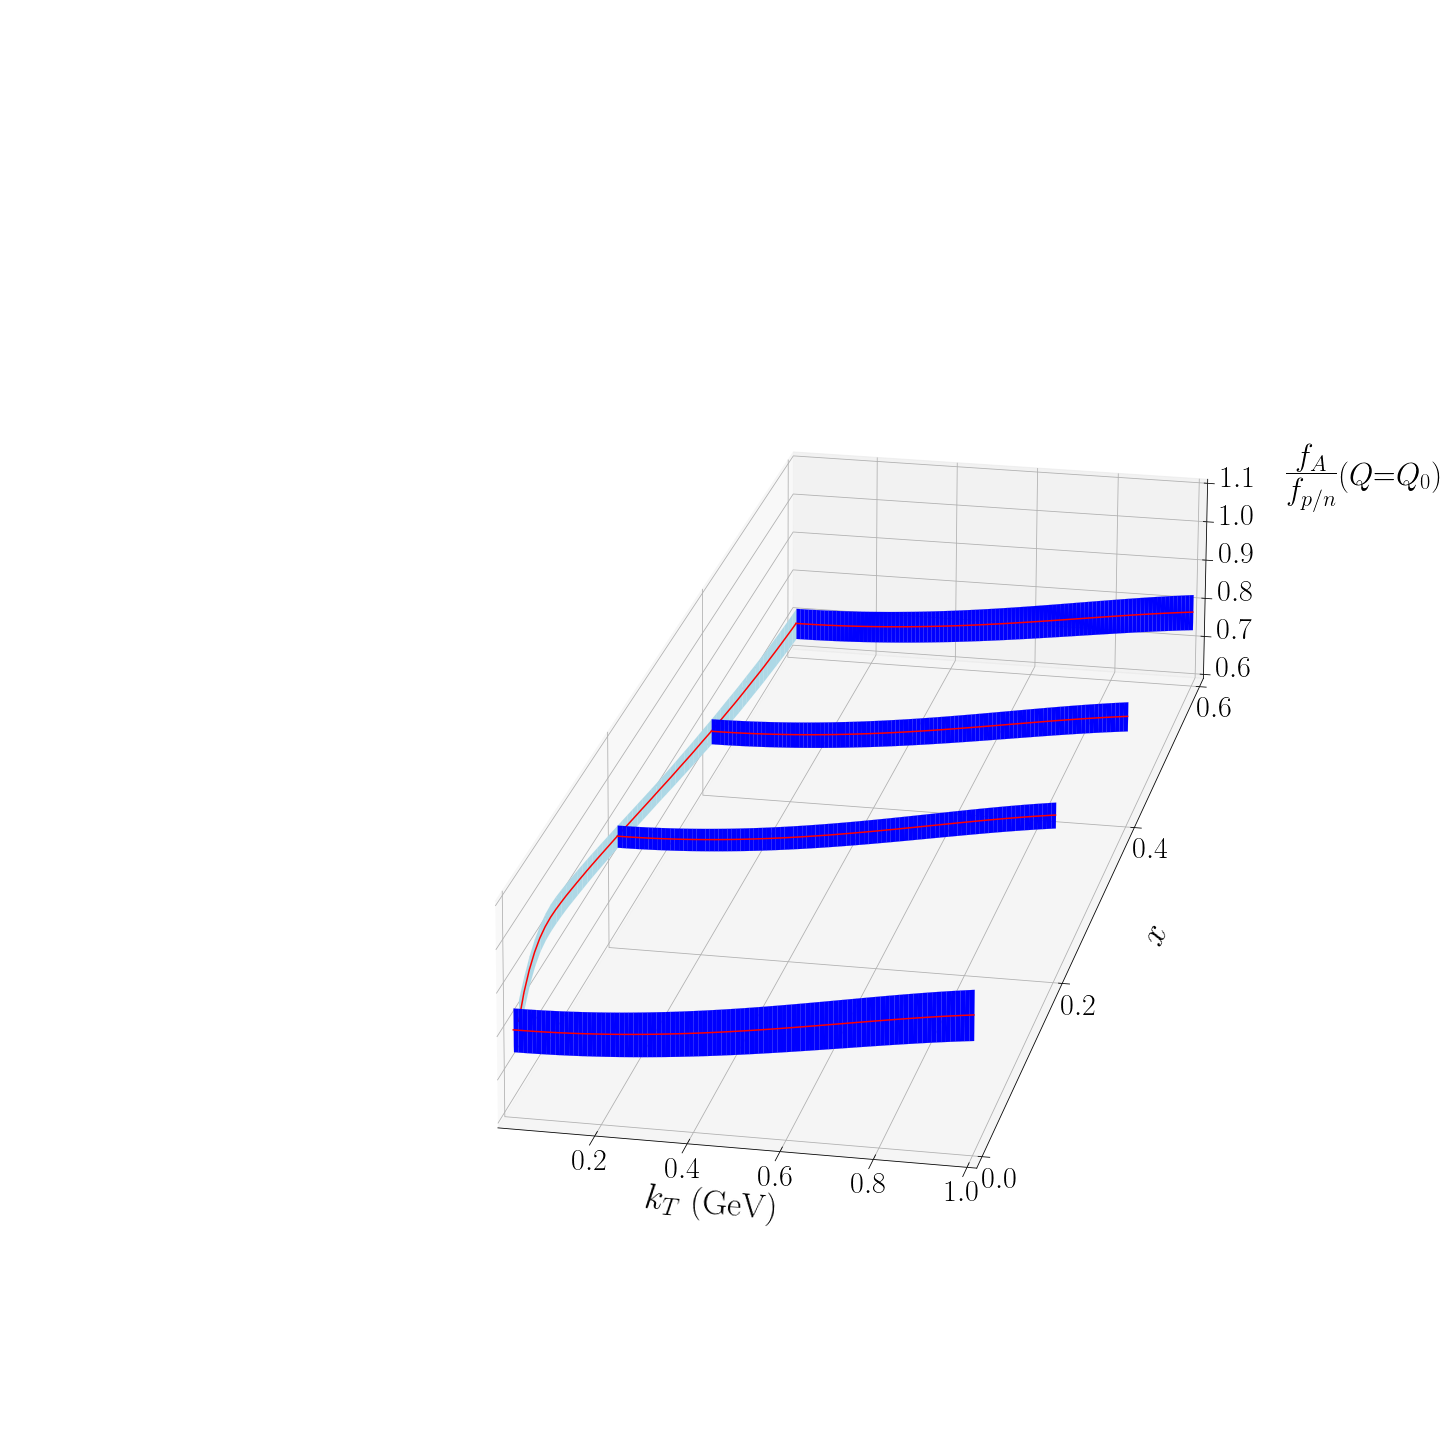

In [270]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(20,20))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))

clr = "blue"

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.8*8, 0.30*8,4]))
ax.view_init(azim=-78,elev=20)
#ax.set_position([-0.80, 0, 1, 1])


xdata,ydata,maxx,minn=plot_3D_x(ax,PDF_KT00_HIGHQ2,u2,"x",0.01,'lightblue',0.61)
ax.plot(xdata,ydata,np.add(maxx,minn)/2,c='red',zorder=63)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X00_HIGHQ2,u2,"kt",0.0,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=200)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X02_HIGHQ2,u2,"kt",0.2,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=300)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X04_HIGHQ2,u2,"kt",0.4,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=400)

xdata,ydata,maxx,minn=plot_3D(ax,PDF_X06_HIGHQ2,u2,"kt",0.6,clr)
ax.plot(xdata,ydata,(maxx+minn)/2,c='red',zorder=500)


ax.set_xlabel(r"\rm $k_T$ (GeV)", fontsize = 35, labelpad = 35)
ax.set_ylabel(r"\rm $x$", fontsize = 35, labelpad = 75)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r"\rm $\frac{f_A}{f_{p/n}}\scriptstyle{(Q=Q_0)}$", fontsize = 45,rotation = 0,labelpad =180)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis = 'both', direction ='in',labelsize = 30)


ax.dist = 20
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([0.0,0.2,0.4,0.6])
#ax.set_zticks([0.7,0.8,0.9,1.0,1.1])



fig.savefig("W_PDF_HIGHQ_ratio.pdf")